## Assignment Week 7

1. Use your eigenproblem solver to find the eigenvalues of the matrix
$$
A =\begin{pmatrix}
−2 &+2 &−3\\
+2 &+1 &−6\\
−1 &−2 &+0
\end{pmatrix}
$$
(1) Verify that you obtain the eigenvalues $\lambda_1 = 5$, $\lambda_2 = \lambda_3 = −3$. Notice that double roots can cause problems. In particular, there is a uniqueness issue with their eigenvectors because any combination of these eigenvectors is also an eigenvector.
(2) Verify that the eigenvector for $λ_1 = 5$ is proportional to
$$
x_1 = \frac{1}{\sqrt{6}}\begin{pmatrix}
−1 \\ −2 \\+1\end{pmatrix}
$$
(3) The eigenvalue −3 corresponds to a double root. This means that the corresponding eigenvectors are degenerate, which in turn means that they are not unique. Two linearly independent ones are 
$$
x_2 = \frac{1}{\sqrt{5}}\begin{pmatrix}
−2\\ +1\\0\end{pmatrix},\quad
x_3 = \frac{1}{\sqrt{10}}\begin{pmatrix}
3\\ 0\\1\end{pmatrix}
$$
In this case, it is not clear what your eigenproblem solver will give for the eigenvectors. Try to find a relationship between your computed eigenvectors with the eigenvalue −3 and these two linearly independent ones.
(Hint：Please read the sample program `Eigen.ipynb` for your reference)


2. Please fit the Millikan data (as shown in the table) directly to a linear function
    $$
    q_k=ke\pm\Delta q_k
    $$
    and analyze the accuracy of the approximation. Assume that

    (1) the error bars $\Delta {q_k}$ in the experimental measurements is a constant as $\Delta q$.

    (2) Different $\Delta {q_k}$ with $\left\vert\Delta {q_k}\right\vert= 0.05q_k$.

 $k$   | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 11    |
 :---- | :---- | :---- | :---- | :---- | :---- | :---- | :---- | :---- |
 $q_k$ | 6.558 | 8.206 | 9.880 | 11.50 | 13.14 | 14.82 | 16.40 | 18.04 |
 
 $k$   | 12    | 13    | 14    | 15    | 16    | 17    | 18    | 
 :---- | :---- | :---- | :---- | :---- | :---- | :---- | :---- |
 $q_k$ | 19.68 | 21.32 | 22.96 | 24.60 | 26.24 | 27.88 | 29.52 |       

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
k = np.arange(4,19)
qk = np.array([6.558,8.206,9.880,11.50,13.14,14.82,16.40,18.04,19.68,21.32,22.96,24.60,26.24,27.88,29.52])

$$
\chi^2 = \sum_{i=1}^N\left(\frac{q_k^{(i)}-ek_i}{\Delta q_k}\right)^2
$$
**(1)** when $\Delta q_k$ is constant,
$$
0 = \frac{\partial \chi^2}{\partial e} = -2\sum_{i=1}^N\frac{q_k^{(i)}-ek_i}{\Delta q_k^2}
$$
get $$
e = \frac{\sum_{i=1}^Nq_k^{(i)}}{\sum_{i=1}^Nk_i}
$$

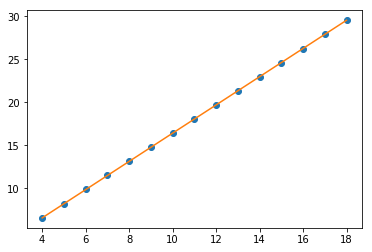

  R^2 = 0.9999923990911664


In [20]:
e = np.sum(qk)/np.sum(k)
plt.plot(k,qk,'o')
plt.plot(k,e*k)
plt.show()
#chi1_square = np.sum( (qk - e*k)**2 )
R1_square = 1 - np.sum( (qk - e*k)**2 ) / np.sum((qk-np.mean(qk))**2)
#print(f'chi^2 = {chi1_square}')
print(f'  R^2 = {R1_square}')

$R^2$非常接近1，近似精确度较高

**(2)** if $\left\vert\Delta {q_k}\right\vert= 0.05q_k$,
$$
0 = \frac{\partial \chi^2}{\partial e} = -2\sum_{i=1}^N\frac{q_k^{(i)}-ek_i}{\Delta q_k^2} =  -800\sum_{i=1}^N\frac{q_k^{(i)}-ek_i}{q_k^{(i)2}}
$$

$$
e = \frac{\sum_{i = 1}^N1/q_k^{(i)}}{\sum_{i = 1}^Nk_i/q_k^{(i)}}
$$

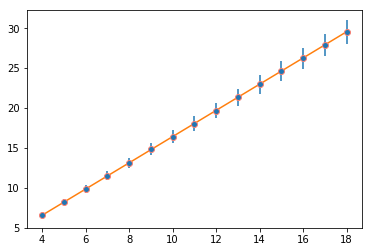

chi^2 = 0.01204864432182769
  R^2 = 0.9999894602155894


In [19]:
e = np.sum(1/qk)/np.sum(k/qk**2)
error_range = [0.05*qk,0.05*qk]
plt.errorbar(k,qk,fmt = 'o',yerr = error_range,mec='salmon')
plt.plot(k,e*k)
plt.show()
chi2_square = np.sum( (qk - e*k)**2 / (0.05*qk)**2 )
R2_square = 1 - np.sum( (qk - e*k)**2 ) / np.sum((qk-np.mean(qk))**2)
print(f'chi^2 = {chi2_square}')
print(f'  R^2 = {R2_square}')

$R^2$非常接近1，近似精确度较高

3. Derive the linearization form for each of the following functions:
    $$
    \begin{array}{llll}
    (1) &y=\dfrac{A}{x}+B  &    (2) &y=\dfrac{D}{x+C}\\
    (3) &y=\dfrac{1}{Ax+B} &    (4) &y=\dfrac{x}{A+Bx}\\
    (5) &y=A\ln x+B &      (6)& y=Cx^{A}\\
    (7) &y=\left( Ax+B\right) ^{-2} &   (8) & y=Cxe^{-Dx}
    \end{array}
    $$

$$
\begin{array}{llll}
(1) &y = A\left(\frac{1}{x}\right)+B  & (2) &\frac{1}{y} = \frac{x}{D}+\frac{C}{D}\\
(3) &\frac{1}{y} = Ax+B &    (4) &\frac{1}{y} = A\frac{1}{x}+B\\
(5) &y = A(\ln x) + B &    (6) &\ln y = A\ln x +\ln C\\
(7) &\frac{1}{y^{1/2}} = Ax + B &    (8) &\ln{\frac{y}{x}} = -Dx+\ln C
\end{array}
$$

4. In 1929 Edwin Hubble examined the data in the table relating the radial velocity $v$ of 24 extra galactic nebulae to their distance $r$ from our galaxy[^Hubble]. Although there was considerable scatter in the data, he fit them with a straight line:
    $$
    v = Hr
    $$
    where $H$ is now called the Hubble constant. 

    (1) Plot the data to verify the appropriateness of a linear relation
    $$
    v(r) \approx a + Hr
    $$
    (2) Deduce a value for the error $\sigma_i$ for each point as how much the histogram values appear to fluctuate about a smooth curve.
    (3) Compute a least-squares straight-line fit to these data.
    (4) Plot your fit on the curve with the data.
    (5) After fitting the data, compute the variance and verify that approximately     one-third of the points miss the $\sigma$ error band (that’s what is expected for a
    random distribution of errors).
    (6) Determine the $\chi^2$ of the fit and comment on its value.
    [^Hubble]: Hubble, E. (1929), A relation between distance and radial velocity among extra-galactic nebulae, Proc. Nat. Academy of Sciences of the United States of America, 15, 168-173.

| Object | $r$ | $v$ (km/s) |  Object| $r$ | $v$ (km/s) |Object| $r$ | $v$ (km/s) |
| --- | --- |  --- | --- | --- | --- |  --- | --- | --- | 
|-| 0.032 | 170  | 3627 |0.9 | 650 |-| 0.034 |290|
|4826| 0.9 |150| 6822| 0.214| -130|4649| 2.0| 1090|
|5236 |0.9| 500| 598| 0.263| -70|1068| 1.0 |920|
|221| 0.275 |-185 |5055 |1.1 |450|224| 0.275| -220|
|7331| 1.1| 500| 5457| 0.45| 200|4258 |1.4| 500|
|4736| 0.5| 290| 4141| 1.7| 960|5194| 0.5 |270|
|4382 |2.0 |500 |4449 |0.63 |200|4472 |2.0| 850|
|4214 |0.8 |300 |4486| 2.0 |800|3031| 0.9| -30|

5. Measurements of thermal conductivity, $\kappa$(W/mK) , of silicon at various temperatures, $T (K)$, are given as follows:
  
| $T$ (K)         | 50   | 100  | 150  | 200  | 400  | 600  | 800  | 1000 |
| --------------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| $\kappa$ (W/mK) | 28   | 9.1  | 4.0  | 2.7  | 1.1  | 0.6  | 0.4  | 0.3  |




The data is to be fitted with a function of the form $\kappa=f(T)$. Determine which of the nonlinear equations: power function, exponential function, saturation function, can best fit the data and determine its parameters. Make a plot that shows the data points and the theoretical values.

6. Please complete your review of the numerical method and python programming. More details can be found in the file CP_review_202004.pdf(.md).